In [14]:
import os
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import requests
from sklearn.linear_model import Ridge
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,validation_curve,learning_curve
from sklearn.metrics import log_loss, auc, roc_auc_score, accuracy_score,plot_confusion_matrix, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.ensemble import GradientBoostingClassifier as gbm
from sklearn.model_selection import cross_val_score,cross_validate
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
import io
import timeit
import itertools
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools
import timeit
from collections import Counter
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict

In [15]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.01, 1.0, 30)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")


    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    plt.tight_layout()
    return plt,test_scores, fit_times

def print_score(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        print("Train Results: \n")
        print("Accuracy Report: {0:.3f} \n".format(accuracy_score(y_train,clf.predict(X_train))))
        print("Classification Report: \n{}\n".format(classification_report(y_train,clf.predict(X_train))))
        print("Confusion Matrix Report: \n{}\n".format(confusion_matrix(y_train,clf.predict(X_train))))
    
        res=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')        
        print("Average Accuracy: \t{0:.3f}".format(np.mean(res)))
        print("Average SD: \t{0:.3f}".format(np.std(res)))


    elif train==False:
        print("Test Results: \n")
        print("Accuracy Report: {0:.3f} \n".format(accuracy_score(y_test,clf.predict(X_test))))
        print("Classification Report: \n{}\n".format(classification_report(y_test,clf.predict(X_test))))
        print("Confusion Matrix Report: \n{}\n".format(confusion_matrix(y_test,clf.predict(X_test))))
    



In [16]:
#Telecom Churn Data Set
df_tel=pd.read_csv ("Churn_Telecom.csv")
df_tel.pop('customerID')
df_tel.TotalCharges = pd.to_numeric(df_tel.TotalCharges, errors='coerce')
df_tel.isnull().sum()
df_tel.dropna(inplace = True)
df_tel['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_tel['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_1_tel = pd.get_dummies(df_tel)
X,y = df_1_tel.drop(['Churn'], axis=1),df_1_tel['Churn']
X = df_1_tel
X.pop('Churn')
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns=features

In [17]:
#Bank Churn Data Set
df_cus=pd.read_csv("CC GENERAL.csv")
df_cus.pop('CUST_ID')
#df_cus.EstimatedSalary = pd.to_numeric(df_cus.EstimatedSalary, errors='coerce')
#df_cus.Balance = pd.to_numeric(df_cus.Balance, errors='coerce')    
df_cus.isnull().sum()
df_cus.dropna(inplace = True)
df_cus['Exited'].replace(to_replace='Yes', value=1, inplace=True)
df_cus['Exited'].replace(to_replace='No',  value=0, inplace=True)
df_1_cus = pd.get_dummies(df_cus)
X_cus,y_cus = df_1_cus.drop(['Exited'], axis=1),df_1_cus['Exited']
X_cus = df_1_cus
X_cus.pop('Exited')
features_cus = X_cus.columns.values
scaler_cus = MinMaxScaler(feature_range = (0,1))
scaler_cus.fit(X_cus)
X_cus = pd.DataFrame(scaler_cus.transform(X_cus))
X_cus.columns=features_cus
title = "Learning Curves"


In [18]:
def predict_cluster(Y,Labels):
    assert (Y.shape == Labels.shape)
    predict_y = np.empty_like(Y)
    for label in set(Labels):
        mask = Labels == label
        sub = Y[mask]
        target = Counter(sub).most_common(1)[0][0]
        predict_y[mask] = target  
    return predict_y

def DistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    n1 = pairwise_distances(X1)
    n2 = pairwise_distances(X2)
    return np.corrcoef(n1.ravel(),n2.ravel())[0,1]

def dataset_fun():
    X1 = X
    Y1 = y
    X2= X_cus
    Y2= y_cus
    return X1,Y1,X2,Y2

In [19]:
def kmeans_exec(X,y,title):

    clusters = list(np.arange(2,60,2))
    silho_scores = []
    train_times = []
    f1_scores = []
    hm_scores = []
    

    for i in clusters:
        start_time = timeit.default_timer()
        km = KMeans(n_clusters=i, n_init=20,random_state=100,n_jobs=-1).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)
        silho_scores.append(sil_score(X, km.labels_))
        y_cluster = predict_cluster(y,km.labels_)
        hm_scores.append(homogeneity_score(y, km.labels_))
      

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, silho_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Elbow for KMeans: '+ title)
    plt.show()
   
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(clusters, hm_scores)
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores KMeans: '+ title)
    plt.show()
    return train_times

def means_score(df, X, y,t):
    if t=='km':
        start_time = timeit.default_timer()
        df.fit(X, y)
        end_time = timeit.default_timer()
        training_time = end_time - start_time

        y_cluster = predict_cluster(y,df.labels_)
        auc = roc_auc_score(y, y_cluster)
        f1 = f1_score(y, y_cluster)
        accuracy = accuracy_score(y, y_cluster)
        precision = precision_score(y, y_cluster)
        recall = recall_score(y, y_cluster)
        conf = confusion_matrix(y, y_cluster)

        print("Model Evaluation Metrics Using Mode Cluster Vote")
        print("*****************************************************")
        print("Model Training Time (s):   "+"{:.2f}".format(training_time))
        print("No. Iterations to Converge: {}".format(df.n_iter_))
        print("F1 Score:  "+"{:.2f}".format(f1))
        print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
        print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
        print("*****************************************************")
        plt.figure()
        plot_confusion_matrix_t(conf, classes=["0","1"], title='Confusion Matrix')

        plt.show()
    elif t=='EM':     
        start_time = timeit.default_timer()
        df.fit(X, y)
        end_time = timeit.default_timer()
        training_time = end_time - start_time

        labels = df.predict(X)
        y_cluster = predict_cluster(y,labels)
        auc = roc_auc_score(y, y_cluster)
        f1 = f1_score(y, y_cluster)
        accuracy = accuracy_score(y, y_cluster)
        precision = precision_score(y, y_cluster)
        recall = recall_score(y, y_cluster)
        cm = confusion_matrix(y, y_cluster)

        print("Model Evaluation Metrics Using Mode Cluster Vote")
        print("*****************************************************")
        print("Model Training Time (s):   "+"{:.2f}".format(training_time))
        print("No. Iterations to Converge: {}".format(df.n_iter_))
        print("Log-likelihood Lower Bound: {:.2f}".format(df.lower_bound_))
        print("F1 Score:  "+"{:.2f}".format(f1))
        print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
        print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
        print("*****************************************************")
        plt.figure()
        plot_confusion_matrix_t(cm, classes=["0","1"], title='Confusion Matrix')
        plt.show()


In [20]:
def EM_exec(X,y,title):
    k_d = list(np.arange(2,100,5))
    silho_scores = []
    train_times = []
    f1_scores = []
    hm_scores = []
    aic_scores = []
    bic_scores = []
    
    for i in k_d:
        start_time = timeit.default_timer()
        em = EM(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)
        
        labels = em.predict(X)
        silho_scores.append(sil_score(X, labels))
        y_cluster = predict_cluster(y,labels)
        f1_scores.append(f1_score(y, y_cluster))
        hm_scores.append(homogeneity_score(y, labels))
        aic_scores.append(em.aic(X))
        bic_scores.append(em.bic(X))
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(k_d, silho_scores)
    plt.grid(True)
    plt.xlabel('Components')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Elbow for EM: '+ title)
    plt.show()
   
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(k_d, hm_scores)
    plt.grid(True)
    plt.xlabel('Components')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores EM: '+ title)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(k_d, aic_scores, label='AIC')
    ax.plot(k_d, bic_scores,label='BIC')
    plt.grid(True)
    plt.xlabel('Components')
    plt.ylabel('Model Complexity Score')
    plt.title('EM Model Complexity: '+ title)
    plt.legend(loc="best")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(k_d, f1_scores)
    plt.grid(True)
    plt.xlabel('Components')
    plt.ylabel('F1 Score')
    plt.title('F1 Scores EM: '+ title)
    plt.show()



 

In [169]:
def PCA_exec(X,y,title):
    
    pca_check = PCA(random_state=5).fit(X) #for all components
    cum_t = np.cumsum(pca_check.explained_variance_ratio_)

    fig, ax1 = plt.subplots()
    ax1.plot(list(range(len(pca_check.explained_variance_ratio_))), cum_t, 'b-')
    ax1.set_xlabel('Principal Components')
    ax1.set_ylabel('Cumulative Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(list(range(len(pca_check.singular_values_))), pca_check.singular_values_, 'm-')
    ax2.set_ylabel('Eigen values', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()
    
def ICA_exec(X,y,title):
    
    dimension = list(np.arange(2,(X.shape[1]-1),3))
    dimension.append(X.shape[1])
    ica_check = ICA(random_state=5)
    kurt = []

    for dim in dimension:
        ica_check.set_params(n_components=dim)
        tmp = ica_check.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dimension, kurt, 'b-')
    plt.grid(False)
    plt.show()

def RCA_exec(X,y,title):
    
    dimension = list(np.arange(2,(X.shape[1]-1),3))
    dimension.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dimension):
        dt = RCA(random_state=i, n_components=dim)
        tmp[dim][i] = DistCorr(dt.fit_transform(X), X)
    tmp = pd.DataFrame(tmp).T
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dimension,mean_recon, 'b-')
    ax1.set_xlabel('Random Component')
    ax1.set_ylabel('Mean Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dimension,std_recon, 'm-')
    ax2.set_ylabel('STD Correlation', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("Random 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()
    
def RFC_exec(X,y,df_rfc):
    rfc = RFC(n_estimators=1000,min_samples_leaf=round(len(X)*.03),random_state=100,n_jobs=-1)
    rfc_feature = rfc.fit(X,y).feature_importances_ 
    rfc_feature = pd.DataFrame(rfc_feature,columns=['Feature Importance'],index=df_rfc.columns)
    rfc_feature.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
    rfc_feature['CSum'] = rfc_feature['Feature Importance'].cumsum()
    rfc_feature = rfc_feature[rfc_feature['CSum']<=0.55]
    rfc_index = rfc_feature.index.tolist()
    return rfc_feature, rfc_index

def plot_confusion_matrix_t(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(2), range(2)):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.41
No. Iterations to Converge: 35
F1 Score:  0.40
Accuracy:  0.75     AUC:       0.61
Precision: 0.56     Recall:    0.31
*****************************************************


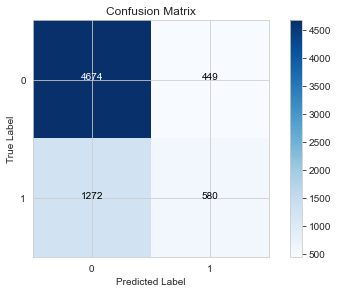

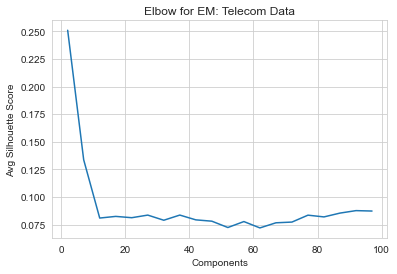

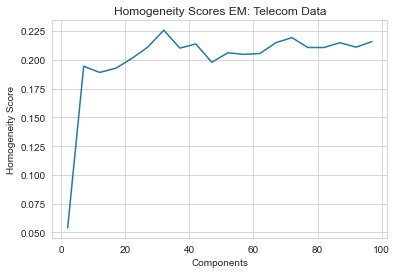

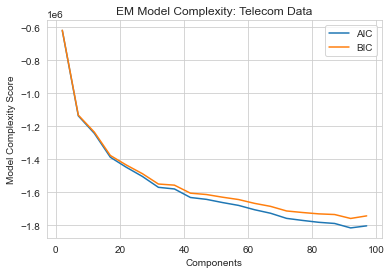

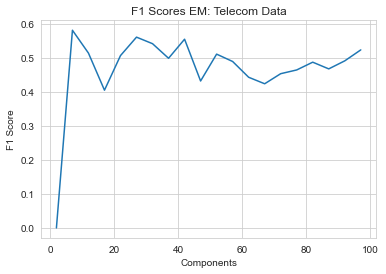

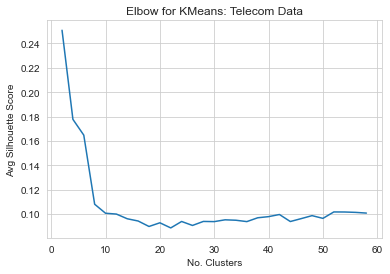

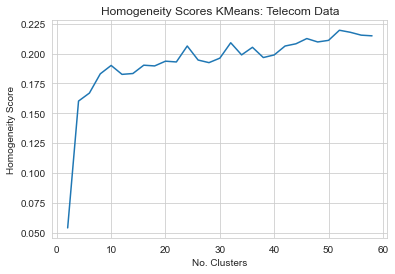

In [34]:
churnX,churnY,cusX,cusY = dataset_fun()
#run_kmeans(phishX,phishY,'Phishing Data')
km = KMeans(n_clusters=9,n_init=10,random_state=100,n_jobs=-1)
means_score(km,churnX,churnY,'km')
EM_exec(churnX,churnY,"Telecom Data")
kmeans_exec(churnX,churnY,"Telecom Data")
df = pd.DataFrame(km.cluster_centers_)
df.to_csv("Telecom kMeans Cluster Centers.csv")

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.29
No. Iterations to Converge: 16
F1 Score:  0.56
Accuracy:  0.60     AUC:       0.60
Precision: 0.55     Recall:    0.57
*****************************************************


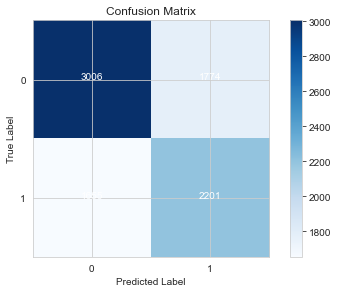

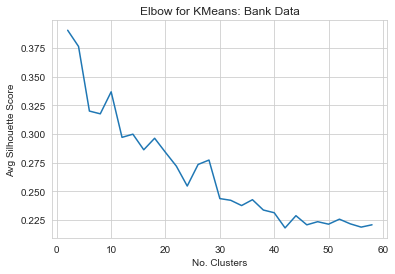

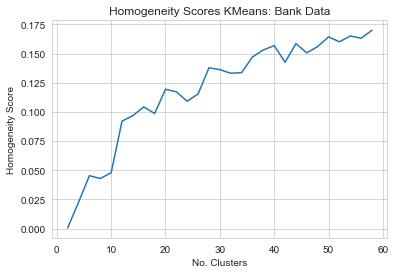

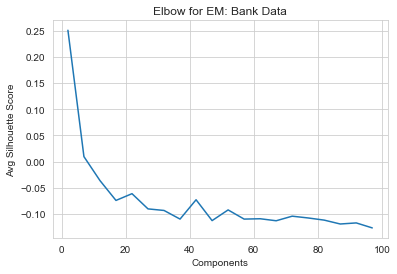

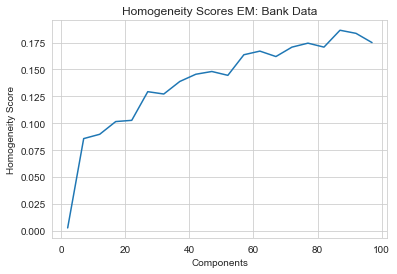

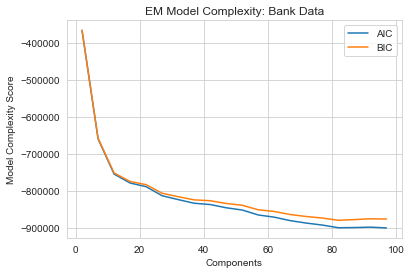

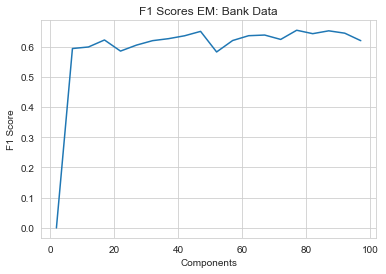

In [24]:
churnX,churnY,cusX,cusY = dataset_fun()
#run_kmeans(phishX,phishY,'Phishing Data')
km = KMeans(n_clusters=9,n_init=10,random_state=100,n_jobs=-1)
means_score(km,cusX,cusY,'km')
kmeans_exec(cusX,cusY,"Bank Data")
EM_exec(cusX,cusY,"Bank Data")
df = pd.DataFrame(km.cluster_centers_)
df.to_csv("Banks kMeans Cluster Centers.csv")

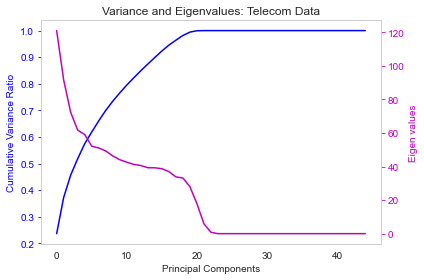

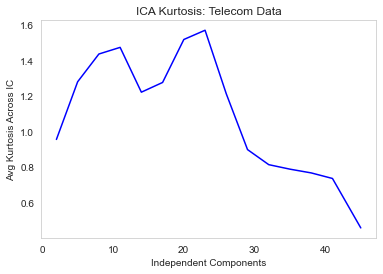

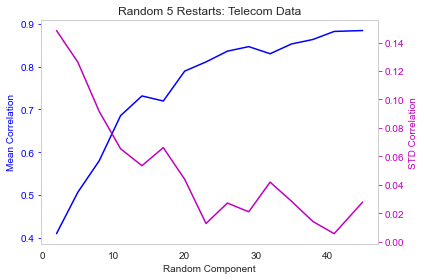

In [149]:
churnX,churnY,cusX,cusY = dataset_fun()
PCA_exec(churnX,churnY,"Telecom Data")
ICA_exec(churnX,churnY,"Telecom Data")
RCA_exec(churnX,churnY,"Telecom Data")
rfc_feature_tel, rfc_index_tel = RFC_exec(churnX,churnY,df_1_tel)

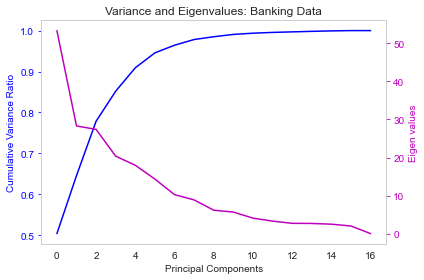

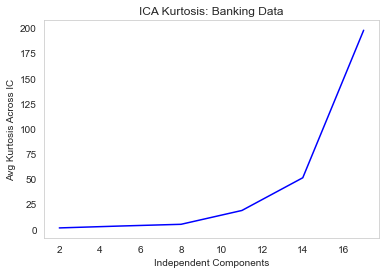

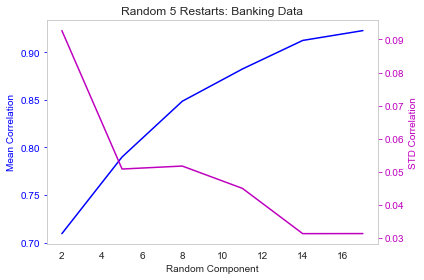

In [150]:
churnX,churnY,cusX,cusY = dataset_fun()
#X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.2)
PCA_exec(cusX,cusY,"Banking Data")
ICA_exec(cusX,cusY,"Banking Data")
RCA_exec(cusX,cusY,"Banking Data")
rfc_feature_bank, rfc_index_bank = RFC_exec(cusX,cusY,df_1_cus)

In [151]:
churnX,churnY,cusX,cusY = dataset_fun()
rfc_feature_tel, rfc_index_tel= RFC_exec(churnX,churnY,df_1_tel)
pca_tel = PCA(n_components=22,random_state=5).fit_transform(churnX)
ica_tel = ICA(n_components=38,random_state=5).fit_transform(churnX)
rca_tel = RCA(n_components=29,random_state=5).fit_transform(churnX)
rfc_tel = df_1_tel[rfc_index_tel]
rfc_tel = np.array(rfc_tel.values,dtype='int64')

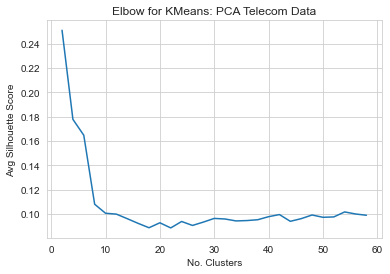

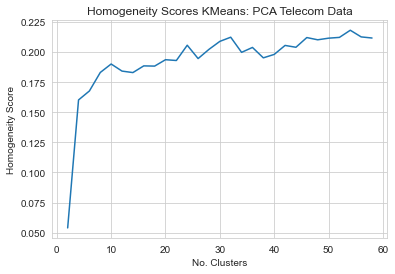

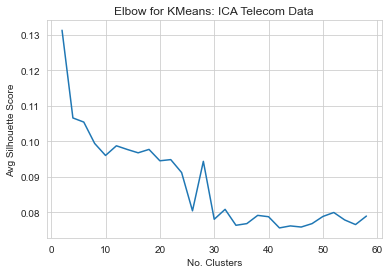

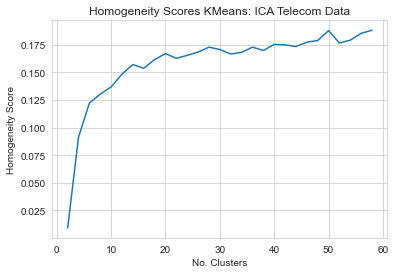

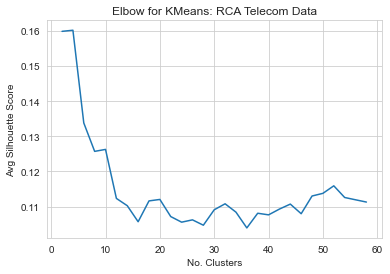

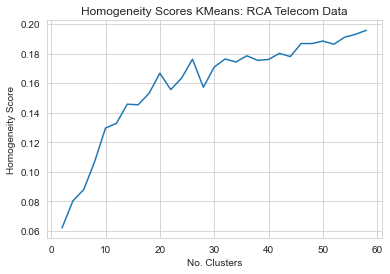

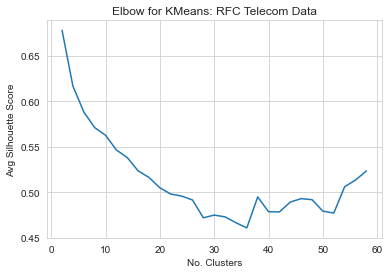

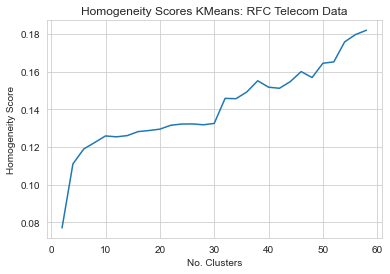

[0.1048945750007988,
 0.18638515399652533,
 0.17237483899953077,
 0.1986535130054108,
 0.21582200499688042,
 0.22798943900124868,
 0.25374391399964225,
 0.27819231200555805,
 0.3136441449969425,
 0.3443197570013581,
 0.3807155180038535,
 0.4146556489940849,
 0.45637899399298476,
 0.48716232200240484,
 0.526472947000002,
 0.5643951079982799,
 0.6048265400022501,
 0.6379836760024773,
 0.667097917998035,
 0.7057148050007527,
 0.7321655989944702,
 0.7710534360012389,
 0.7850459440014674,
 0.8196572220040252,
 0.8508483830009936,
 0.8881771119995392,
 0.904997967001691,
 1.0119415349981864,
 1.0686219230046845]

In [53]:
kmeans_exec(pca_tel,churnY,'PCA Telecom Data')
kmeans_exec(ica_tel,churnY,'ICA Telecom Data')
kmeans_exec(rca_tel,churnY,'RCA Telecom Data')
kmeans_exec(rfc_tel,churnY,'RFC Telecom Data')

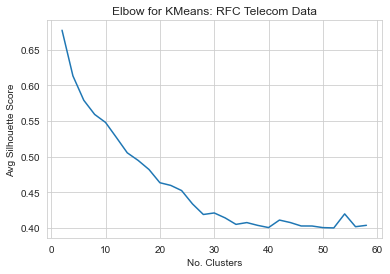

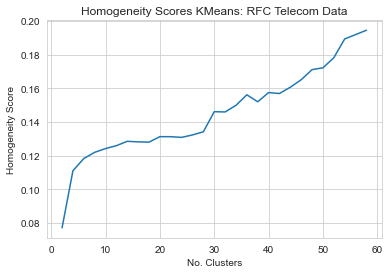

[0.1084294710017275,
 0.1692477019969374,
 0.16468218299996806,
 0.19750400600605644,
 0.21344824000698281,
 0.23480865899909986,
 0.27568144999531796,
 0.3025367890004418,
 0.3338130039992393,
 0.3645965250034351,
 0.43029784400278004,
 0.44269317900034366,
 0.48589587000606116,
 0.5294847959958133,
 0.5701608290037257,
 0.6188968799979193,
 0.662574643996777,
 0.6994609079993097,
 0.7402111740011605,
 0.7770554199960316,
 0.812315570001374,
 0.8383554879983421,
 0.872847238999384,
 0.9296368670038646,
 0.9495909930046764,
 0.9792438689983101,
 1.008254569998826,
 1.0884504450004897,
 1.129280964996724]

In [152]:
kmeans_exec(rfc_tel,churnY,'RFC Telecom Data')

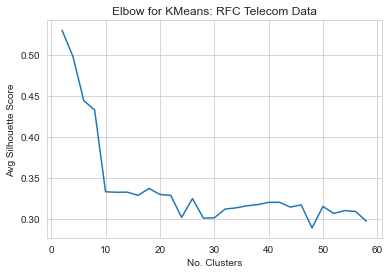

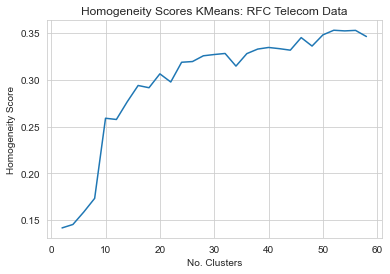

[0.18023342300148215,
 0.4123092910012929,
 0.3979481309943367,
 0.49331048400199506,
 0.6353121479987749,
 0.7266982889996143,
 0.8085091050015762,
 0.9529066590039292,
 0.9632029589993181,
 1.1456932119981502,
 1.2956791529941256,
 1.2660639349996927,
 1.4113248249996104,
 1.3091965640051058,
 1.5176260049993289,
 1.5186259570036782,
 1.535482745995978,
 1.6460080559991184,
 1.7871447579964297,
 1.7372591280000051,
 1.9534125990030589,
 1.9409034979980788,
 2.1755007570027374,
 2.070538501997362,
 2.2071971479963395,
 2.3193746190008824,
 2.4470250500016846,
 2.677450483002758,
 2.544659815997875]

In [165]:
kmeans_exec(rfc_bank,cusY,'RFC Telecom Data')

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.70
No. Iterations to Converge: 33
F1 Score:  0.55
Accuracy:  0.75     AUC:       0.69
Precision: 0.54     Recall:    0.56
*****************************************************


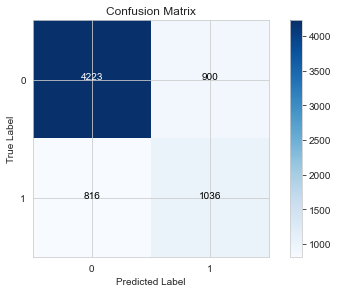

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   1.43
No. Iterations to Converge: 42
F1 Score:  0.44
Accuracy:  0.77     AUC:       0.63
Precision: 0.60     Recall:    0.35
*****************************************************


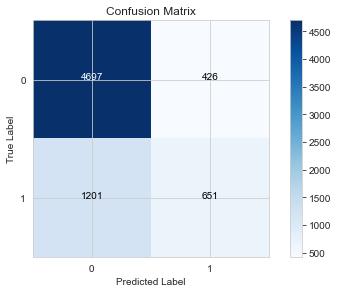

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.41
No. Iterations to Converge: 29
F1 Score:  0.51
Accuracy:  0.75     AUC:       0.67
Precision: 0.53     Recall:    0.49
*****************************************************


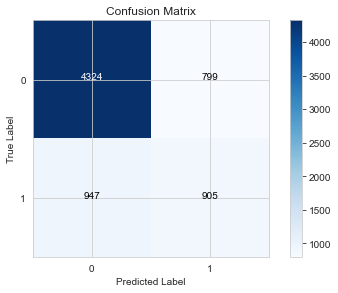

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.14
No. Iterations to Converge: 3
F1 Score:  0.44
Accuracy:  0.75     AUC:       0.63
Precision: 0.55     Recall:    0.36
*****************************************************


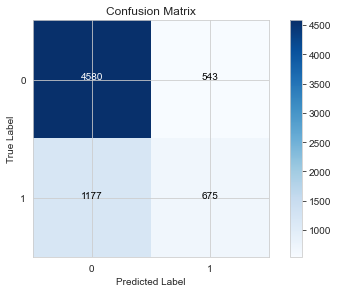

In [54]:
means_score(KMeans(n_clusters=20,n_init=10,random_state=100,n_jobs=-1),pca_tel,churnY,'km')
means_score(KMeans(n_clusters=47,n_init=10,random_state=100,n_jobs=-1),ica_tel,churnY,'km')
means_score(KMeans(n_clusters=10,n_init=10,random_state=100,n_jobs=-1),rca_tel,churnY,'km')
means_score(KMeans(n_clusters=14,n_init=10,random_state=100,n_jobs=-1),rfc_tel,churnY,'km')

                         Feature Importance      CSum
Contract_Month-to-month            0.169787  0.169787
tenure                             0.139058  0.308845
OnlineSecurity_No                  0.087794  0.396639
TechSupport_No                     0.080163  0.476801 ['Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'TechSupport_No']
Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.18
No. Iterations to Converge: 7
F1 Score:  0.37
Accuracy:  0.76     AUC:       0.60
Precision: 0.59     Recall:    0.27
*****************************************************


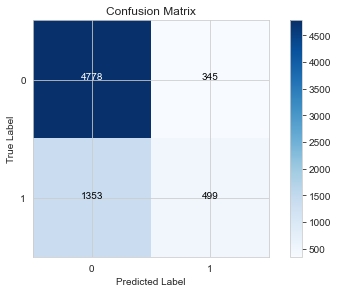

In [170]:
rfc_feature_tel, rfc_index_tel = RFC_exec(churnX,churnY,df_1_tel)
print(rfc_feature_tel,rfc_index_tel)
rfc_tel = df_1_tel[rfc_index_tel]
rfc_tel = np.array(rfc_tel.values,dtype='int64')
means_score(KMeans(n_clusters=20,n_init=10,random_state=100,n_jobs=-1),rfc_tel,churnY,'km')

                  Feature Importance      CSum
BALANCE                     0.481098  0.481098
MINIMUM_PAYMENTS            0.201792  0.682889
CREDIT_LIMIT                0.154926  0.837815
PAYMENTS                    0.046734  0.884549 ['BALANCE', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'PAYMENTS']
Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.59
No. Iterations to Converge: 45
F1 Score:  0.70
Accuracy:  0.77     AUC:       0.75
Precision: 0.81     Recall:    0.62
*****************************************************


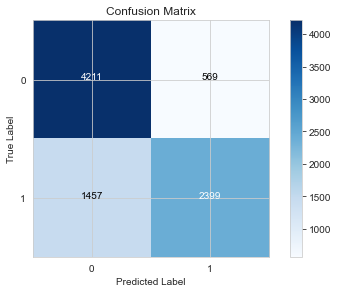

In [164]:
rfc_feature_bank, rfc_index_bank = RFC_exec(cusX,cusY,df_1_cus)
print(rfc_feature_bank,rfc_index_bank)
rfc_bank = df_1_cus[rfc_index_bank]
rfc_bank = np.array(rfc_bank.values,dtype='int64')
means_score(KMeans(n_clusters=20,n_init=10,random_state=100,n_jobs=-1),rfc_bank,cusY,'km')

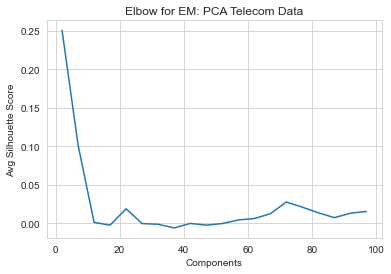

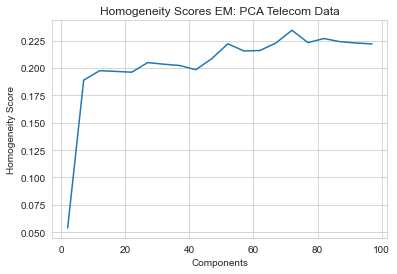

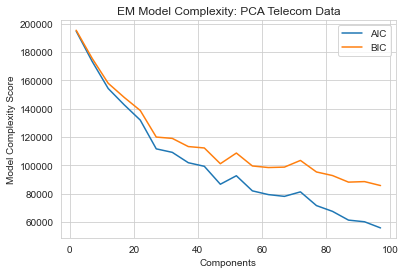

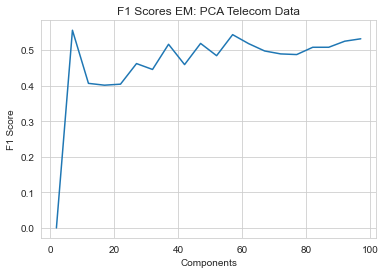

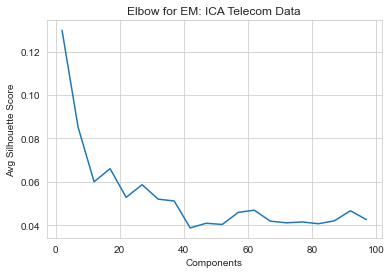

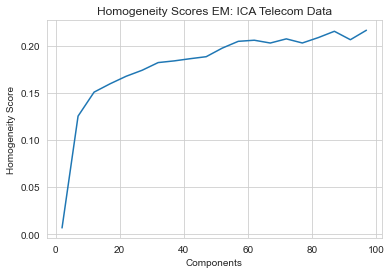

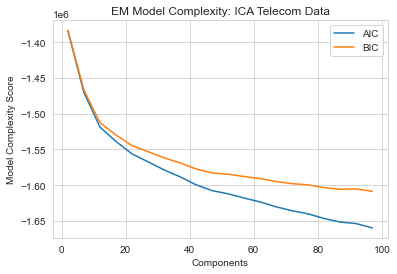

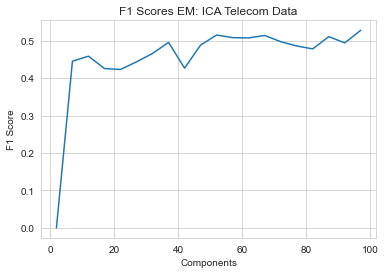

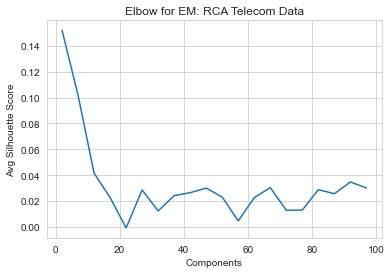

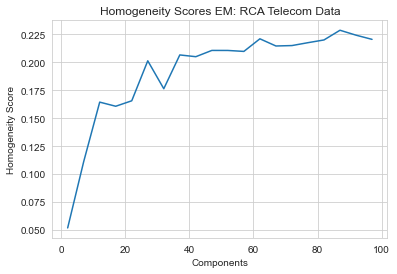

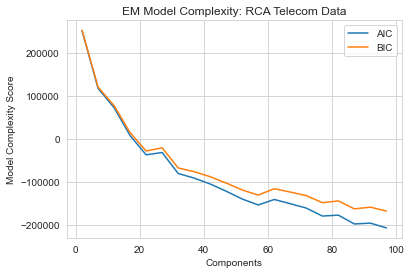

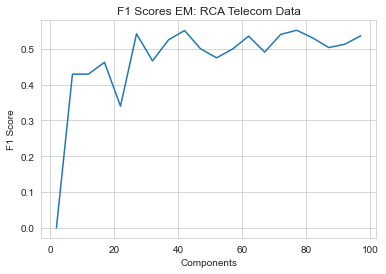

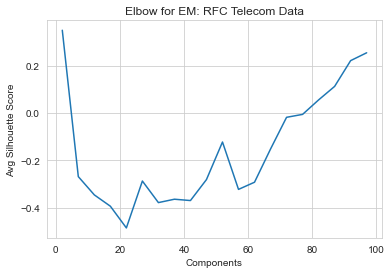

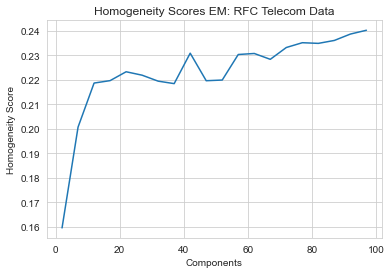

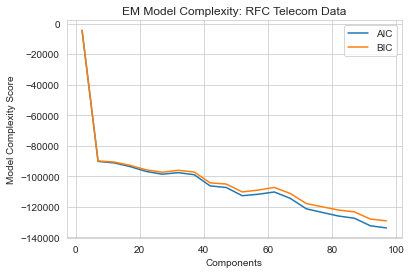

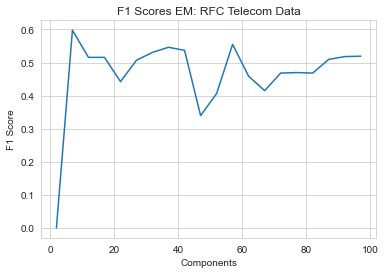

In [55]:
EM_exec(pca_tel,churnY,'PCA Telecom Data')
EM_exec(ica_tel,churnY,'ICA Telecom Data')
EM_exec(rca_tel,churnY,'RCA Telecom Data')
EM_exec(rfc_tel,churnY,'RFC Telecom Data')

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.23
No. Iterations to Converge: 26
Log-likelihood Lower Bound: -10.14
F1 Score:  0.43
Accuracy:  0.77     AUC:       0.63
Precision: 0.64     Recall:    0.32
*****************************************************


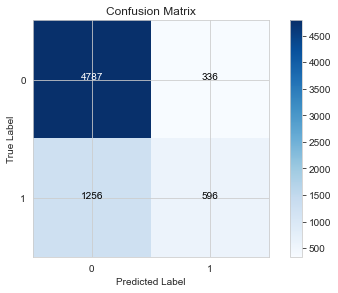

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.33
No. Iterations to Converge: 33
Log-likelihood Lower Bound: 112.92
F1 Score:  0.44
Accuracy:  0.78     AUC:       0.63
Precision: 0.66     Recall:    0.33
*****************************************************


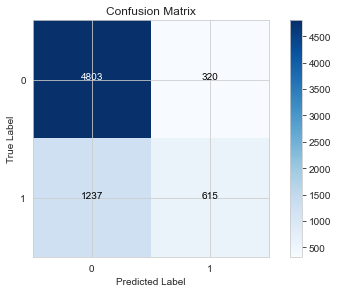

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.40
No. Iterations to Converge: 61
Log-likelihood Lower Bound: 2.07
F1 Score:  0.57
Accuracy:  0.78     AUC:       0.70
Precision: 0.59     Recall:    0.54
*****************************************************


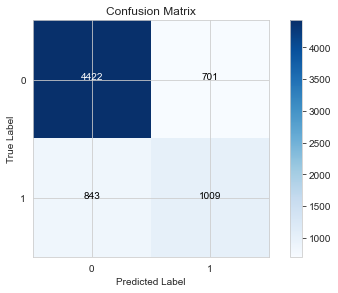

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.18
No. Iterations to Converge: 34
Log-likelihood Lower Bound: 6.96
F1 Score:  0.44
Accuracy:  0.78     AUC:       0.64
Precision: 0.67     Recall:    0.33
*****************************************************


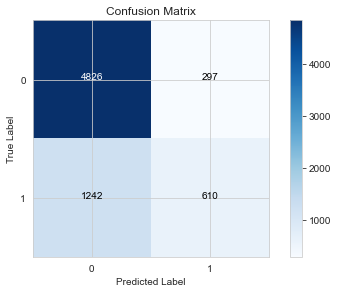

In [56]:
means_score(EM(n_components=18,covariance_type='diag',n_init=1,warm_start=True,random_state=100),pca_tel,churnY,'EM')
means_score(EM(n_components=28,covariance_type='diag',n_init=1,warm_start=True,random_state=100),ica_tel,churnY,'EM')
means_score(EM(n_components=25,covariance_type='diag',n_init=1,warm_start=True,random_state=100),rca_tel,churnY,'EM')
means_score(EM(n_components=22,covariance_type='diag',n_init=1,warm_start=True,random_state=100),rfc_tel,churnY,'EM')

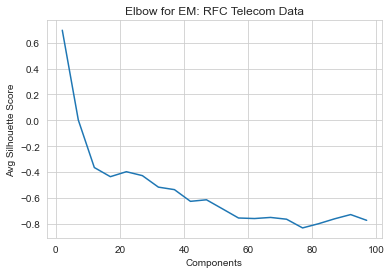

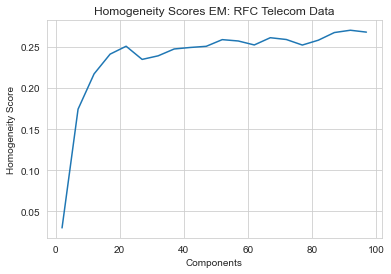

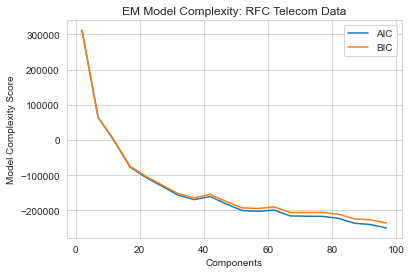

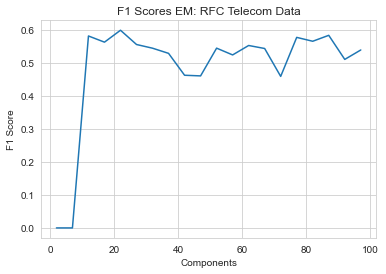

In [166]:
EM_exec(rfc_tel,churnY,'RFC Telecom Data')

In [43]:
pca_bank = PCA(n_components=17,random_state=5).fit_transform(cusX)
ica_bank = ICA(n_components=47,random_state=5).fit_transform(cusX)
rca_bank = RCA(n_components=39,random_state=5).fit_transform(cusX)
rfc_bank = df_1_cus[rfc_index_bank]
rfc_bank = np.array(rfc_bank.values,dtype='int64')

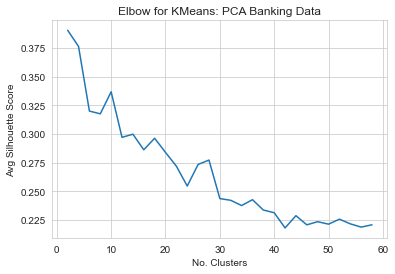

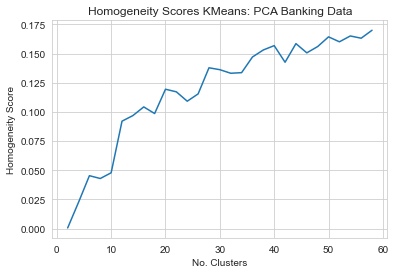

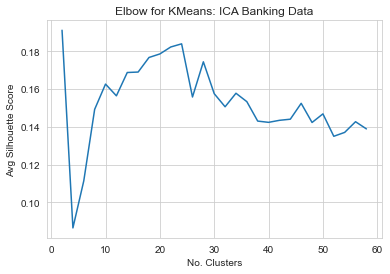

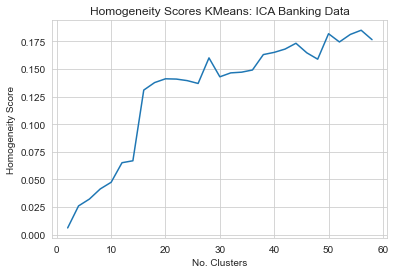

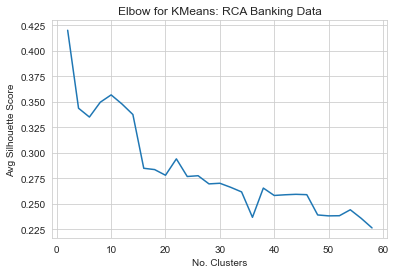

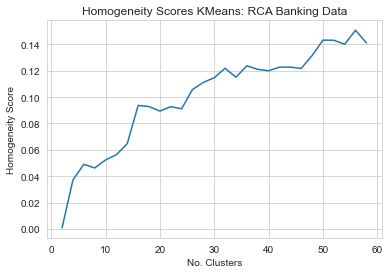

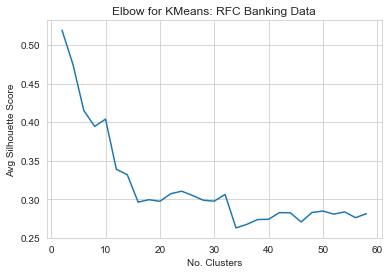

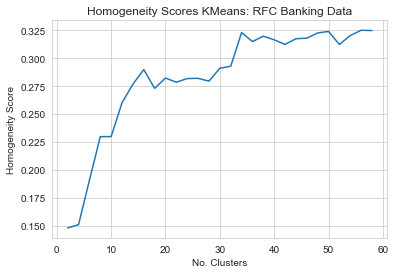

[0.2087501920032082,
 0.5189463509959751,
 0.5182571630066377,
 0.7133012830017833,
 0.6583992439991562,
 0.8152166520012543,
 0.9485519179943367,
 0.9669790009938879,
 1.0082622490008362,
 1.1952799349965062,
 1.1298643019981682,
 1.3980636690030224,
 1.6201112260023365,
 1.6987703350023367,
 1.7090105060051428,
 1.9308912430060445,
 1.97893618800299,
 2.0359993669990217,
 1.9867240989988204,
 2.218115340001532,
 2.343286461997195,
 2.4167932870041113,
 2.3768095369960065,
 2.444936002000759,
 2.570122976998391,
 2.5146545380048337,
 2.662232105001749,
 2.6785405650007306,
 2.925126463000197]

In [44]:
kmeans_exec(pca_bank,cusY,'PCA Banking Data')
kmeans_exec(ica_bank,cusY,'ICA Banking Data')
kmeans_exec(rca_bank,cusY,'RCA Banking Data')
kmeans_exec(rfc_bank,cusY,'RFC Banking Data')

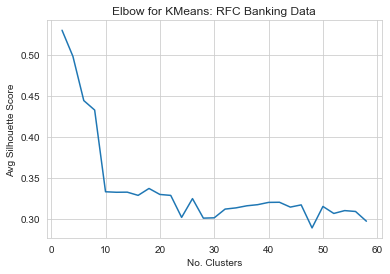

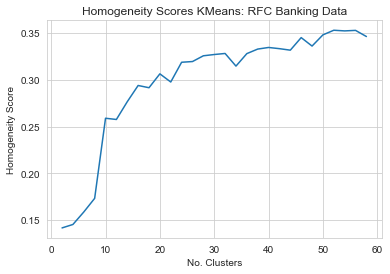

[0.18219864999991842,
 0.4187557610057411,
 0.3990904230013257,
 0.4932155200003763,
 0.6373449250022531,
 0.7284927479995531,
 0.802226141000574,
 0.9535050170015893,
 0.9515493130020332,
 1.1383474620015477,
 1.2897927899975912,
 1.266050249003456,
 1.4163162139957421,
 1.3292399300044053,
 1.5256486710059107,
 1.522225469998375,
 1.530207645999326,
 1.6435242329971516,
 1.7846787970047444,
 1.7370654070036835,
 1.9534655069946893,
 1.9276674889988499,
 2.180278403000557,
 2.075976157000696,
 2.2084076590035693,
 2.3302173819974996,
 2.46273629800271,
 2.66393071100174,
 2.528468274998886]

In [167]:
kmeans_exec(rfc_bank,cusY,'RFC Banking Data')

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.63
No. Iterations to Converge: 18
F1 Score:  0.50
Accuracy:  0.66     AUC:       0.63
Precision: 0.72     Recall:    0.39
*****************************************************


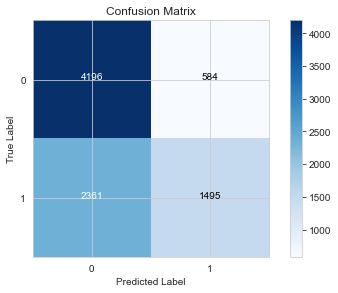

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   1.41
No. Iterations to Converge: 55
F1 Score:  0.61
Accuracy:  0.69     AUC:       0.67
Precision: 0.70     Recall:    0.54
*****************************************************


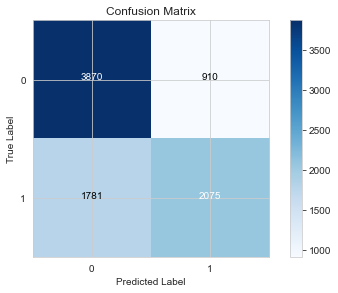

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.32
No. Iterations to Converge: 15
F1 Score:  0.57
Accuracy:  0.61     AUC:       0.61
Precision: 0.56     Recall:    0.58
*****************************************************


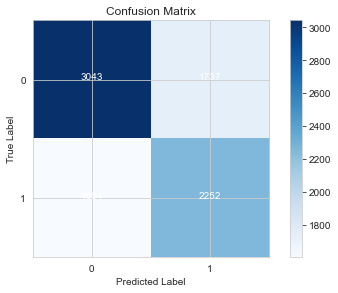

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.54
No. Iterations to Converge: 44
F1 Score:  0.71
Accuracy:  0.77     AUC:       0.75
Precision: 0.80     Recall:    0.64
*****************************************************


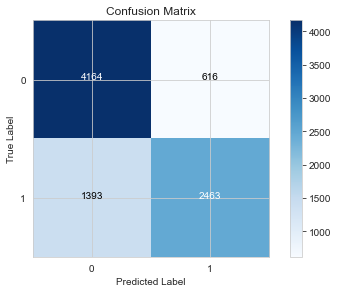

In [45]:
means_score(KMeans(n_clusters=20,n_init=10,random_state=100,n_jobs=-1),pca_bank,cusY,'km')
means_score(KMeans(n_clusters=47,n_init=10,random_state=100,n_jobs=-1),ica_bank,cusY,'km')
means_score(KMeans(n_clusters=10,n_init=10,random_state=100,n_jobs=-1),rca_bank,cusY,'km')
means_score(KMeans(n_clusters=14,n_init=10,random_state=100,n_jobs=-1),rfc_bank,cusY,'km')

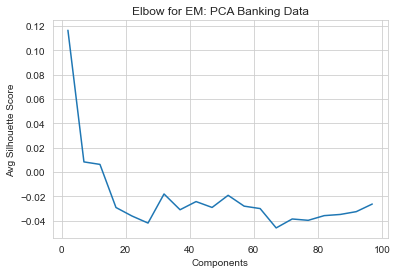

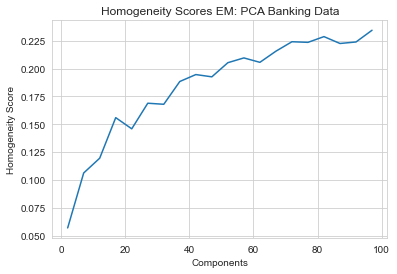

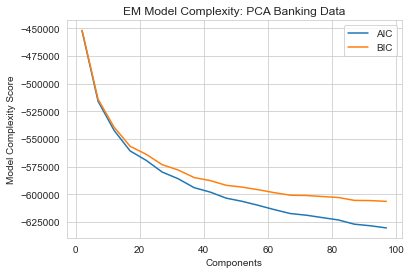

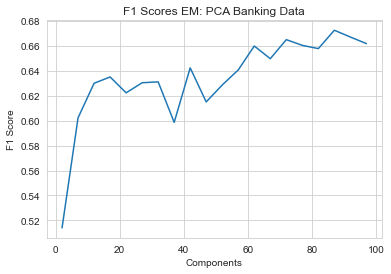

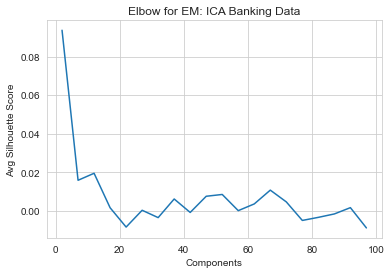

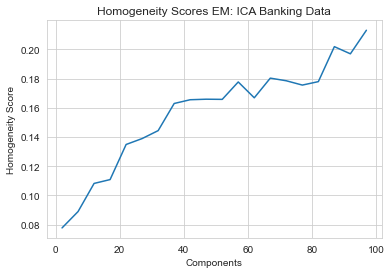

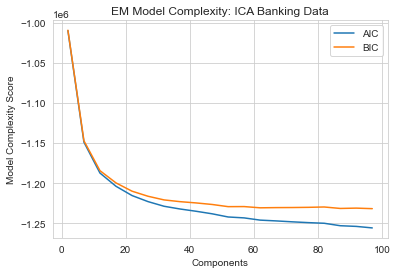

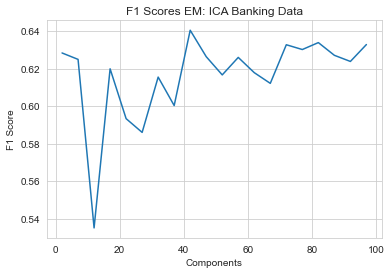

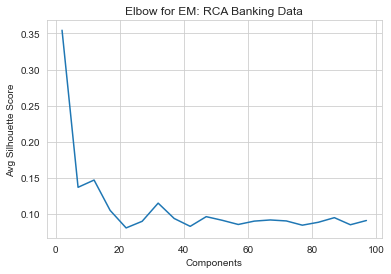

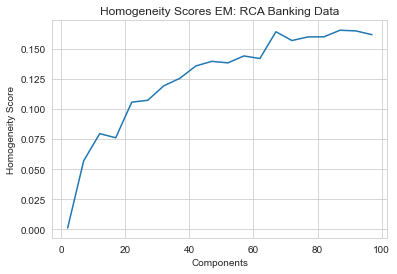

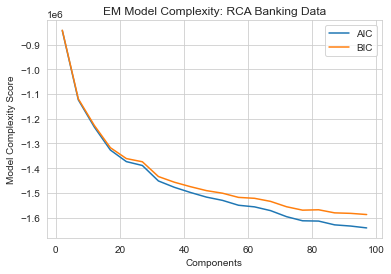

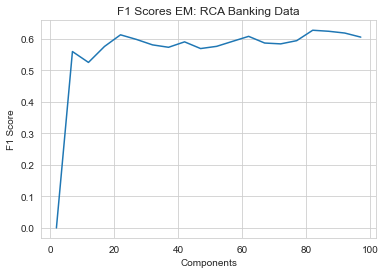

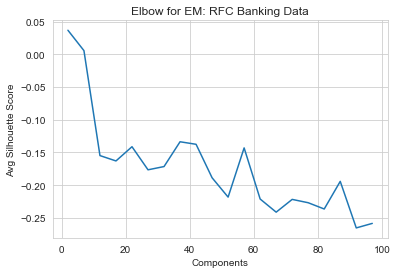

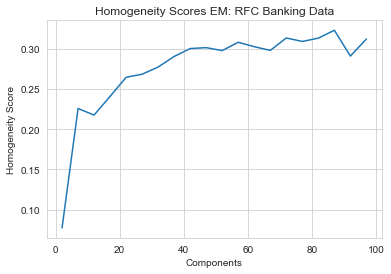

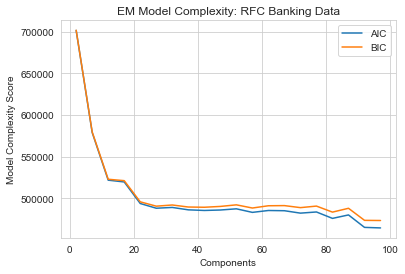

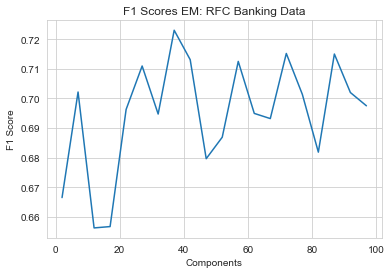

In [57]:
EM_exec(pca_bank,cusY,'PCA Banking Data')
EM_exec(ica_bank,cusY,'ICA Banking Data')
EM_exec(rca_bank,cusY,'RCA Banking Data')
EM_exec(rfc_bank,cusY,'RFC Banking Data')

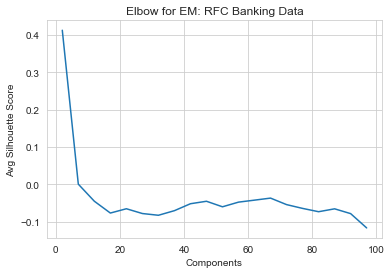

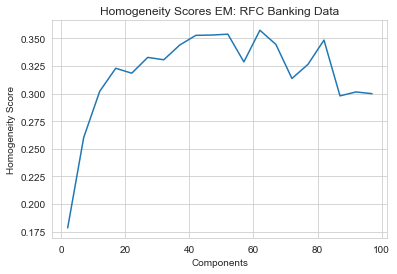

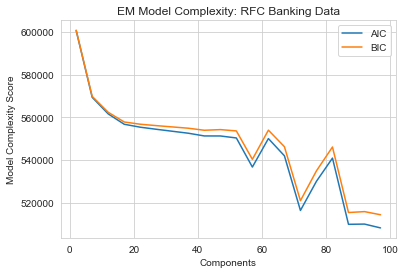

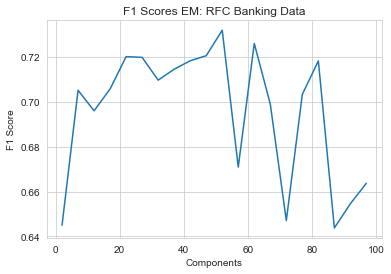

In [168]:
EM_exec(rfc_bank,cusY,'RFC Banking Data')

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.30
No. Iterations to Converge: 39
Log-likelihood Lower Bound: 32.62
F1 Score:  0.64
Accuracy:  0.71     AUC:       0.70
Precision: 0.71     Recall:    0.59
*****************************************************


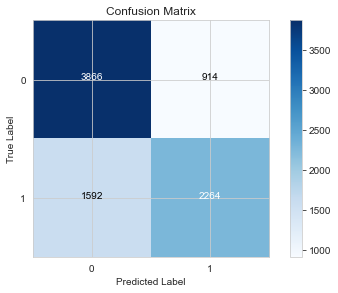

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.44
No. Iterations to Converge: 47
Log-likelihood Lower Bound: 70.90
F1 Score:  0.58
Accuracy:  0.69     AUC:       0.67
Precision: 0.72     Recall:    0.48
*****************************************************


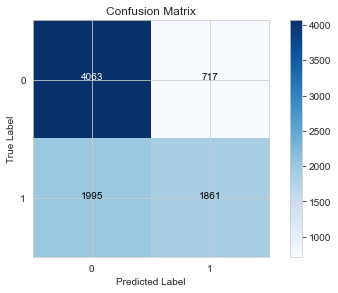

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.44
No. Iterations to Converge: 45
Log-likelihood Lower Bound: 80.84
F1 Score:  0.58
Accuracy:  0.67     AUC:       0.65
Precision: 0.66     Recall:    0.52
*****************************************************


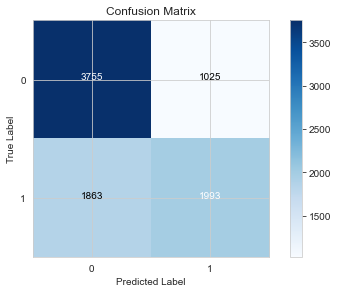

Model Evaluation Metrics Using Mode Cluster Vote
*****************************************************
Model Training Time (s):   0.32
No. Iterations to Converge: 45
Log-likelihood Lower Bound: -28.55
F1 Score:  0.70
Accuracy:  0.76     AUC:       0.74
Precision: 0.78     Recall:    0.63
*****************************************************


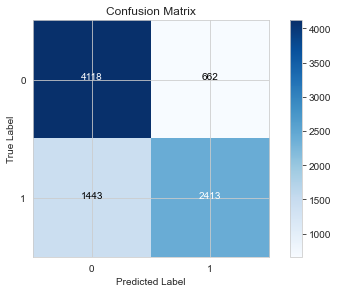

In [46]:
means_score(EM(n_components=18,covariance_type='diag',n_init=1,warm_start=True,random_state=100),pca_bank,cusY,'EM')
means_score(EM(n_components=28,covariance_type='diag',n_init=1,warm_start=True,random_state=100),ica_bank,cusY,'EM')
means_score(EM(n_components=25,covariance_type='diag',n_init=1,warm_start=True,random_state=100),rca_bank,cusY,'EM')
means_score(EM(n_components=22,covariance_type='diag',n_init=1,warm_start=True,random_state=100),rfc_bank,cusY,'EM')

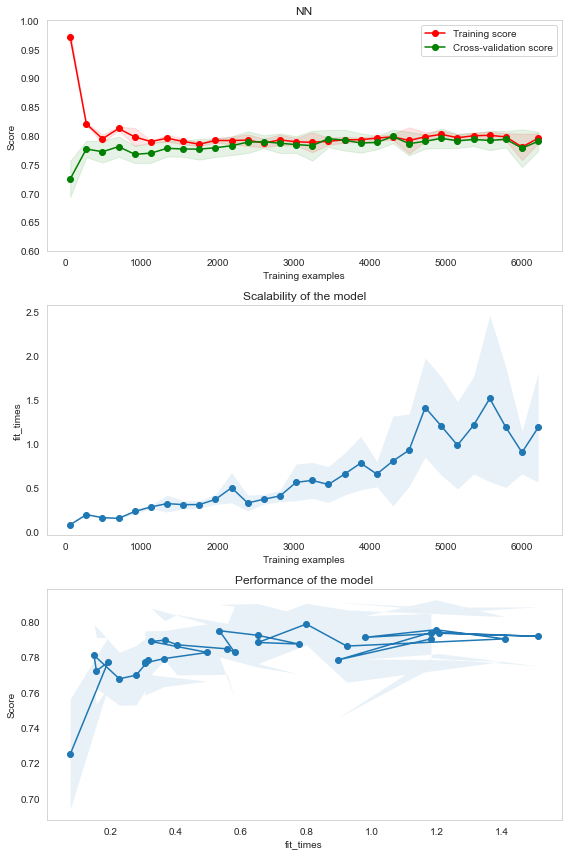

In [199]:
X_train, X_test, y_train, y_test = train_test_split(np.array(cusX),np.array(cusY), test_size=0.20)
full_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
#train_samp_full, NN_train_score_full, NN_fit_time_full, NN_pred_time_full = plot_learning_curve(full_est, X_train, y_train,title="Neural Net Phishing: Full")
full_est.fit(X_train,y_train)
fig,axes = plt.subplots(3, figsize=(8, 12))
train_sizes_full, train_scores, test_scores = learning_curve(full_est, X_train, y_train,train_sizes=np.linspace(0.01, 1.0, 30))
plt,full_test_scores_tel, full_fit_times_tel=plot_learning_curve(full_est, "NN", X_train, y_train, axes=axes, ylim=(0.6, 1),cv=10)


plt.show()

In [24]:
print_score(full_est,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.814 

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3830
           1       0.91      0.65      0.76      3078

    accuracy                           0.81      6908
   macro avg       0.84      0.80      0.80      6908
weighted avg       0.83      0.81      0.81      6908


Confusion Matrix Report: 
[[3625  205]
 [1079 1999]]

Average Accuracy: 	0.802
Average SD: 	0.019


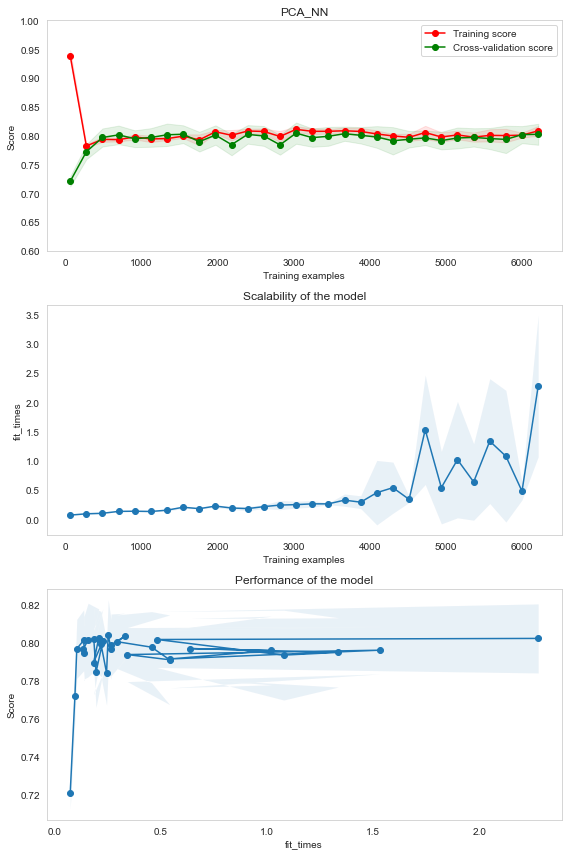

In [25]:
X_train, X_test, y_train, y_test = train_test_split(np.array(pca_bank),np.array(cusY), test_size=0.20)
pca_nn = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
pca_nn.fit(X_train,y_train)
train_sizes_pca, train_scores_pca, test_scores_pca = learning_curve(pca_nn, X_train, y_train,train_sizes=np.linspace(0.01, 1.0, 30))
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_pca, rfc_fit_times_bank_pca = plot_learning_curve(pca_nn, "PCA_NN", X_train, y_train, axes=axes, ylim=(0.6, 1),cv=10)

plt.show()

In [26]:
print_score(pca_nn,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.814 

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      3858
           1       0.90      0.65      0.76      3050

    accuracy                           0.81      6908
   macro avg       0.84      0.80      0.80      6908
weighted avg       0.83      0.81      0.81      6908


Confusion Matrix Report: 
[[3642  216]
 [1066 1984]]

Average Accuracy: 	0.797
Average SD: 	0.022


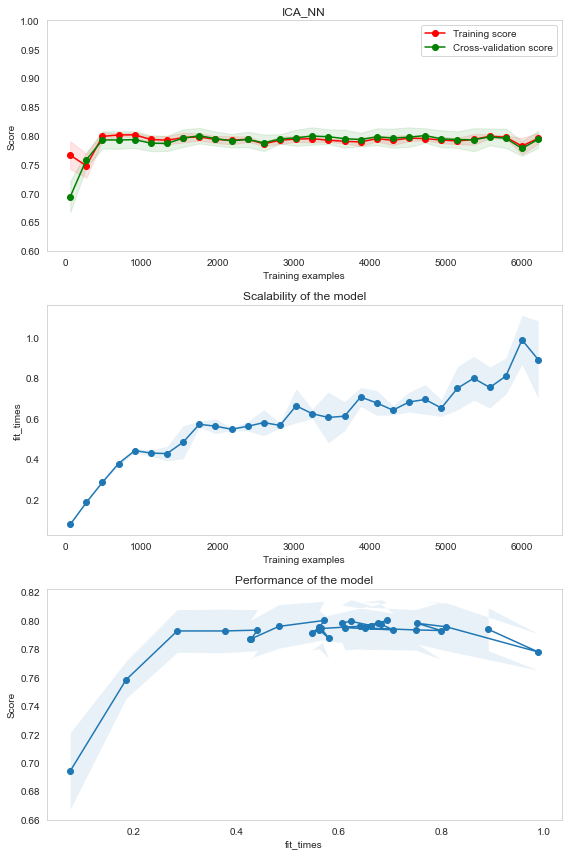

In [27]:
X_train, X_test, y_train, y_test = train_test_split(np.array(ica_bank),np.array(cusY), test_size=0.20)
ica_nn = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
ica_nn.fit(X_train,y_train)
train_sizes_ica, train_scores_ica, test_scores_ica = learning_curve(ica_nn, X_train, y_train,train_sizes=np.linspace(0.01, 1.0, 30))
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_ica, rfc_fit_times_bank_ica = plot_learning_curve(ica_nn, "ICA_NN", X_train, y_train, axes=axes, ylim=(0.6, 1),cv=10)

plt.show()


In [28]:
print_score(ica_nn,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.791 

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      3794
           1       0.82      0.68      0.75      3114

    accuracy                           0.79      6908
   macro avg       0.80      0.78      0.78      6908
weighted avg       0.80      0.79      0.79      6908


Confusion Matrix Report: 
[[3339  455]
 [ 988 2126]]

Average Accuracy: 	0.793
Average SD: 	0.015


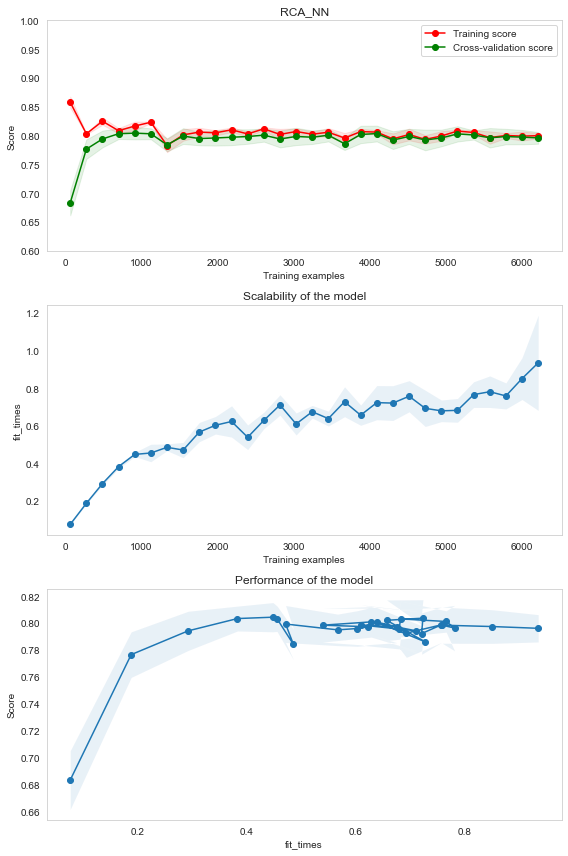

In [29]:

X_train, X_test, y_train, y_test = train_test_split(np.array(rca_bank),np.array(cusY), test_size=0.20)
rca_nn = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
rca_nn.fit(X_train,y_train)
train_sizes_rca, train_scores_rca, test_scores_rca = learning_curve(rca_nn, X_train, y_train,train_sizes=np.linspace(0.01, 1.0, 30))
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_rca, rfc_fit_times_bank_rca = plot_learning_curve(rca_nn, "RCA_NN", X_train, y_train, axes=axes, ylim=(0.6, 1),cv=10)

plt.show()


In [30]:
print_score(rca_nn,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.805 

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      3806
           1       0.88      0.65      0.75      3102

    accuracy                           0.81      6908
   macro avg       0.82      0.79      0.80      6908
weighted avg       0.82      0.81      0.80      6908


Confusion Matrix Report: 
[[3538  268]
 [1079 2023]]

Average Accuracy: 	0.796
Average SD: 	0.010


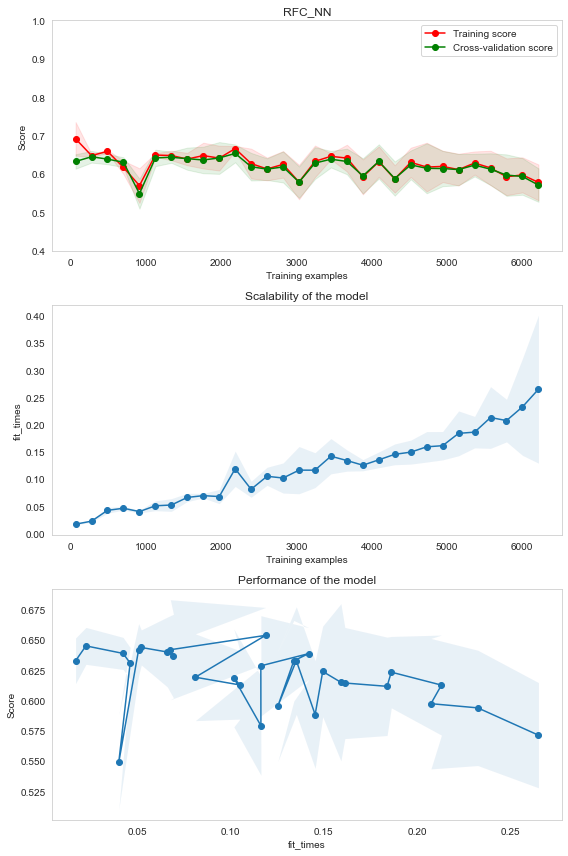

In [171]:
X_train, X_test, y_train, y_test = train_test_split(np.array(rfc_bank),np.array(cusY), test_size=0.20)
rfc_nn = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
rfc_nn.fit(X_train,y_train)
train_sizes_rfc, train_scores_rfc, test_scores_rfc = learning_curve(rfc_nn, X_train, y_train,train_sizes=np.linspace(0.01, 1.0, 30))
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_rfc, rfc_fit_times_bank_rfc = plot_learning_curve(rfc_nn, "RFC_NN", X_train, y_train, axes=axes, ylim=(0.4, 1),cv=10)

plt.show()


In [32]:
print_score(rfc_nn,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.655 

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      3833
           1       0.66      0.46      0.55      3075

    accuracy                           0.66      6908
   macro avg       0.66      0.64      0.63      6908
weighted avg       0.66      0.66      0.64      6908


Confusion Matrix Report: 
[[3097  736]
 [1646 1429]]

Average Accuracy: 	0.598
Average SD: 	0.062


In [204]:
def compare_fit_time(n,full_fit,pca_fit,ica_fit,rca_fit,rfc_fit,title):
    
    plt.figure()
    plt.title("Model Training Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Training Time (s)")
    plt.plot(n, full_fit, '-', color="k", label="Full Dataset")
    plt.plot(n, pca_fit, '-', color="b", label="PCA")
    plt.plot(n, ica_fit, '-', color="r", label="ICA")
    plt.plot(n, rca_fit, '-', color="g", label="RCA")
    plt.plot(n, rfc_fit, '-', color="m", label="RFC")
    plt.legend(loc="best")
    plt.show()

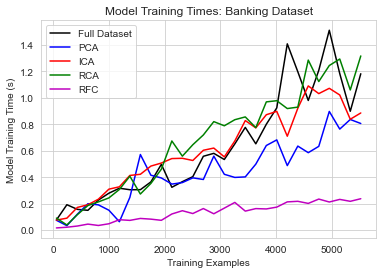

In [205]:
compare_fit_time(train_sizes_full, full_fit_times_tel.mean(axis=1), rfc_fit_times_bank_pca.mean(axis=1), rfc_fit_times_bank_ica.mean(axis=1), 
                 rfc_fit_times_bank_rca.mean(axis=1), rfc_fit_times_bank_rfc.mean(axis=1), 'Banking Dataset')              


In [182]:
def addclusters(X,km_lables,em_lables):
    
    k_cluster = ['KM Cluster', 'EM Cluster']
    df = pd.DataFrame(X)
    df['KM Cluster'] = km_labels
    df['EM Cluster'] = em_labels
    df_new = df[k_cluster]
    df_new = pd.get_dummies(df_new).astype('category')
    df_t = df.drop(k_cluster,axis=1)
    df = pd.concat([df_t,df_new],axis=1)
    new_X = np.array(df.values,dtype='int64')   
    
    return new_X

In [183]:
km = KMeans(n_clusters=9,n_init=10,random_state=100,n_jobs=-1).fit(cusX)
km_labels = km.labels_
em = EM(n_components=24,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(cusX)
em_labels = em.predict(cusX)

clust_full = addclusters(cusX,km_labels,em_labels)
clust_pca = addclusters(pca_bank,km_labels,em_labels)
clust_ica = addclusters(ica_bank,km_labels,em_labels)
clust_rca = addclusters(rca_bank,km_labels,em_labels)
clust_rfc = addclusters(rfc_bank,km_labels,em_labels)

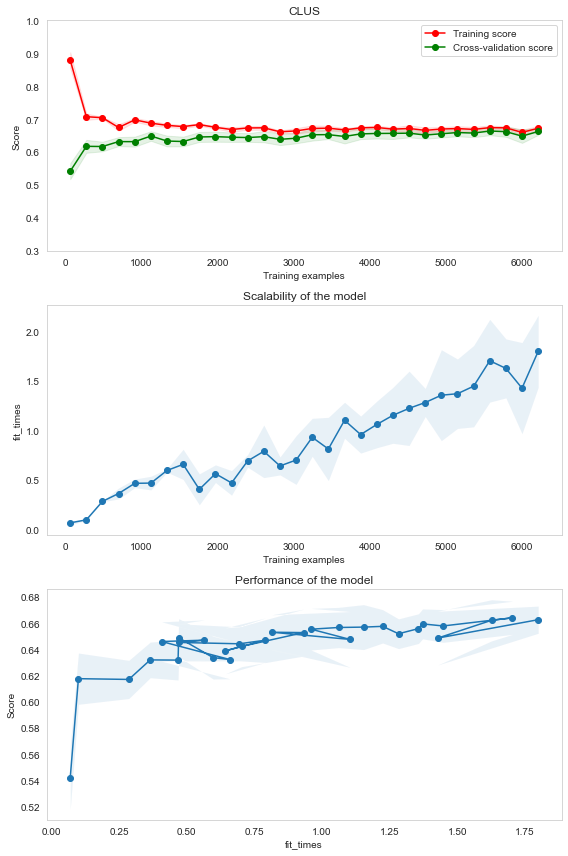

In [184]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_full),np.array(cusY), test_size=0.20)
full_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
full_est.fit(X_train,y_train)
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_clus, rfc_fit_times_bank_clus = plot_learning_curve(full_est, "CLUS", X_train, y_train, axes=axes, ylim=(0.3, 1),cv=10)

plt.show()



In [185]:

print_score(full_est,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.676 

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3843
           1       0.64      0.63      0.63      3065

    accuracy                           0.68      6908
   macro avg       0.67      0.67      0.67      6908
weighted avg       0.68      0.68      0.68      6908


Confusion Matrix Report: 
[[2731 1112]
 [1128 1937]]

Average Accuracy: 	0.661
Average SD: 	0.012


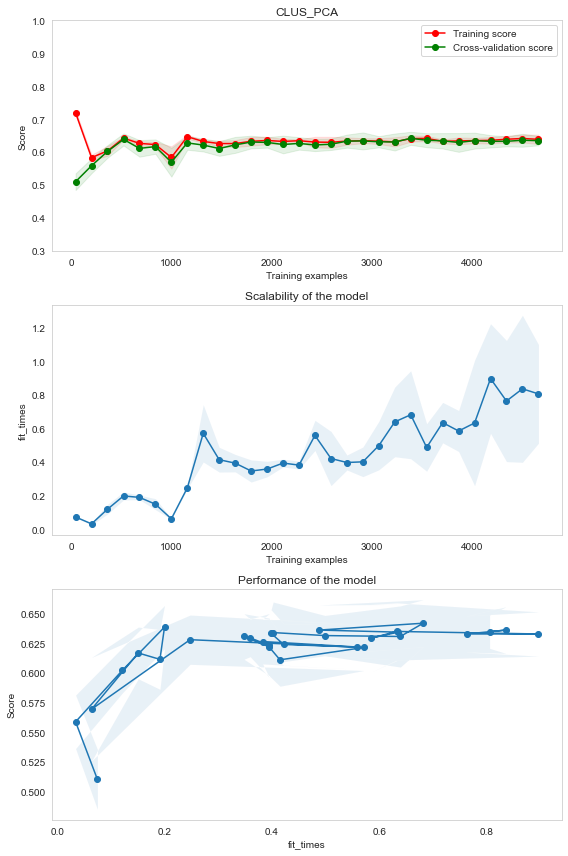

In [186]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_pca),np.array(cusY), test_size=0.40)
pca_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
pca_est.fit(X_train,y_train)
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_pca, rfc_fit_times_bank_pca = plot_learning_curve(pca_est, "CLUS_PCA", X_train, y_train, axes=axes, ylim=(0.3, 1),cv=10)

plt.show()



In [187]:

print_score(pca_est,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.633 

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      2934
           1       0.57      0.61      0.59      2247

    accuracy                           0.63      5181
   macro avg       0.63      0.63      0.63      5181
weighted avg       0.64      0.63      0.63      5181


Confusion Matrix Report: 
[[1908 1026]
 [ 874 1373]]

Average Accuracy: 	0.644
Average SD: 	0.019


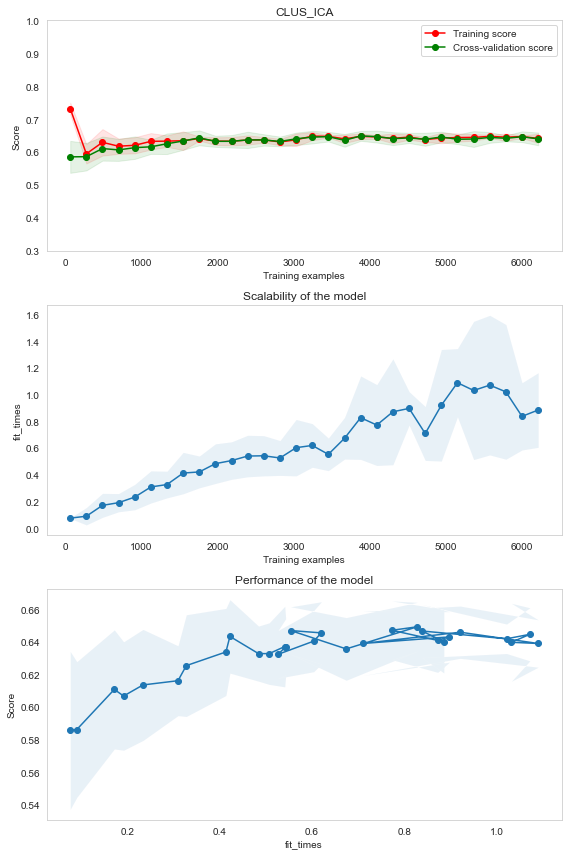

In [188]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_ica),np.array(cusY), test_size=0.20)
ica_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02)
ica_est.fit(X_train,y_train)
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_ica, rfc_fit_times_bank_ica = plot_learning_curve(ica_est, "CLUS_ICA", X_train, y_train, axes=axes, ylim=(0.3, 1),cv=10)

plt.show()



In [189]:


print_score(ica_est,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.655 

Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      3817
           1       0.63      0.55      0.59      3091

    accuracy                           0.66      6908
   macro avg       0.65      0.65      0.65      6908
weighted avg       0.65      0.66      0.65      6908


Confusion Matrix Report: 
[[2824  993]
 [1389 1702]]

Average Accuracy: 	0.641
Average SD: 	0.017


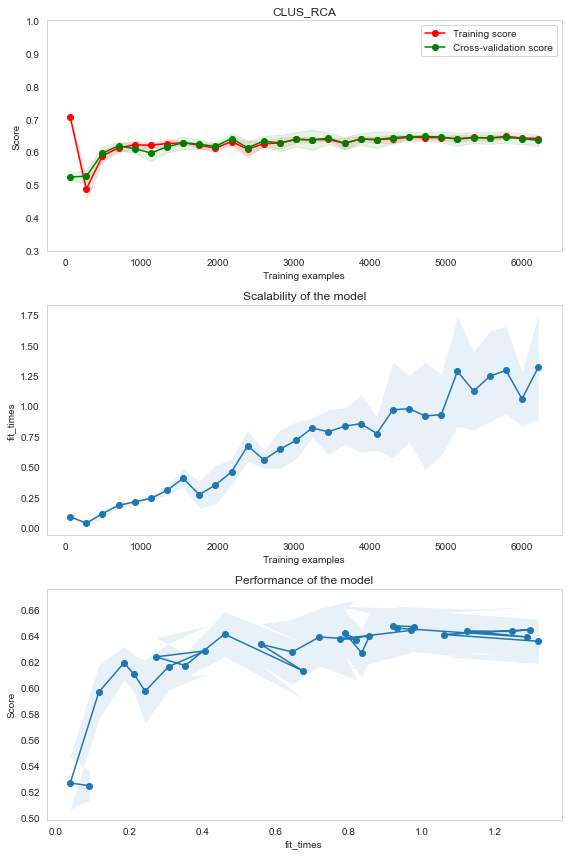

In [190]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_rca),np.array(cusY), test_size=0.20)
rca_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)
rca_est.fit(X_train,y_train)
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_rca, rfc_fit_times_bank_rca = plot_learning_curve(rca_est, "CLUS_RCA", X_train, y_train, axes=axes, ylim=(0.3, 1),cv=10)

plt.show()

In [191]:

print_score(rca_est,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.646 

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      3826
           1       0.62      0.52      0.57      3082

    accuracy                           0.65      6908
   macro avg       0.64      0.63      0.63      6908
weighted avg       0.64      0.65      0.64      6908


Confusion Matrix Report: 
[[2858  968]
 [1479 1603]]

Average Accuracy: 	0.638
Average SD: 	0.017


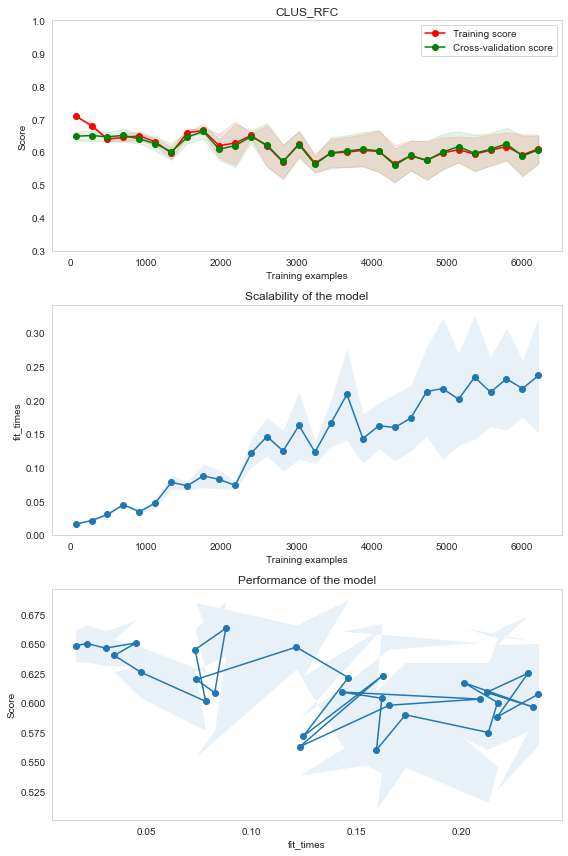

In [192]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_rfc),np.array(cusY), test_size=0.20)
rfc_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)

rfc_est.fit(X_train,y_train)
fig,axes = plt.subplots(3, figsize=(8, 12))
plt,rfc_test_scores_bank_rfc, rfc_fit_times_bank_rfc = plot_learning_curve(rfc_est, "CLUS_RFC", X_train, y_train, axes=axes, ylim=(0.3, 1),cv=10)

plt.show()

In [193]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_rfc),np.array(cusY), test_size=0.20)
print_score(rfc_est,X_train,y_train,X_test,y_test,train=True)

Train Results: 

Accuracy Report: 0.553 

Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.99      0.71      3808
           1       0.56      0.02      0.04      3100

    accuracy                           0.55      6908
   macro avg       0.56      0.50      0.37      6908
weighted avg       0.56      0.55      0.41      6908


Confusion Matrix Report: 
[[3757   51]
 [3035   65]]

Average Accuracy: 	0.600
Average SD: 	0.056


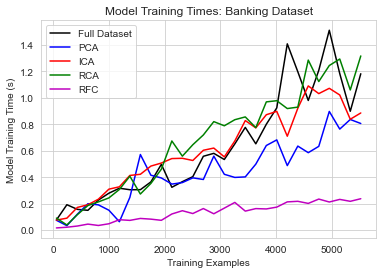

In [203]:
compare_fit_time(train_sizes_full, full_fit_times_tel.mean(axis=1), rfc_fit_times_bank_pca.mean(axis=1), rfc_fit_times_bank_ica.mean(axis=1), 
                 rfc_fit_times_bank_rca.mean(axis=1), rfc_fit_times_bank_rfc.mean(axis=1), 'Banking Dataset')  

In [47]:
from sklearn.neural_network import MLPClassifier

def NN_fun(X_train, y_train, X_test, y_test, title):

    f_test = []
    f_train = []
    hidden_list = np.linspace(50,200,30).astype('int')
    for a in hidden_list:         
            clf = MLPClassifier(hidden_layer_sizes=(a), solver='adam', activation='relu', 
                                learning_rate_init=0.06, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f_test.append(f1_score(y_test, y_pred_test))
            f_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(hidden_list, f_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hidden_list, f_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    

In [ ]:

plt,rfc_test_scores_tel, rfc_fit_times_tel=plot_learning_curve(rfc_est, "RFC", X_train, y_train, axes=axes, ylim=(0.6, 0.9),cv=10)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(clust_rfc),np.array(cusY), test_size=0.20)
rfc_est = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', learning_rate_init=0.02, random_state=100)

rfc_est.fit(X_train,y_train)


train_sizes, train_scores, test_scores = learning_curve(rfc_est, X_train, y_train,train_sizes=np.linspace(0.01, 1.0, 30))

fig,axes = plt.subplots(3, figsize=(8, 12))


plt,rfc_test_scores_tel, rfc_fit_times_tel=plot_learning_curve(rfc_est, "RFC", X_train, y_train, axes=axes, ylim=(0.3, 0.9),cv=10)



plt.show()

In [ ]:
plot_confusion_matrix(ica_est, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [ ]:
    train_sizes, train_scores, test_scores = learning_curve(
        ica_est, X_train, y_train)
    

In [ ]:

    plt.title("Model Learning Rates: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.plot(train_sizes, train_scores, '-', color="k", label="Full Dataset")
    plt.plot(train_sizes, test_scores, '-', color="b", label="PCA")
    plt.legend(loc="best")
    plt.show()

In [ ]:
print(train_scores)

In [ ]:
pca_train_time=kmeans_exec(pca_tel,churnY,'PCA Telecom Data')

In [ ]:
print(pca_train_time)